In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
af = pd.read_hdf('results/ann_catchup_res_20_04_25_49.h5')
af["dup_num"] = 20
bf = pd.read_hdf('results/ann_catchup_res_10_04_25_30.h5')
bf["dup_num"] = 10

In [3]:
cf = pd.concat((af, bf))
cf.columns

Index([u't_len', u'dims', u'n_classes', u'approach', u'accuracy', u'ad_mean',
       u'ad_std', u'gd_mean', u'gd_std', u'conf_mean', u'conf_std',
       u'aug method', u'dup_num'],
      dtype='object')

In [13]:
cf.loc[cf['approach'] == 'fvRNN', 'aug method'] = 'repeat with noise\nand fancy init'
cf.loc[cf['approach'] == 'RC', 'aug method'] = 'reservoir repeat\nwith noise'

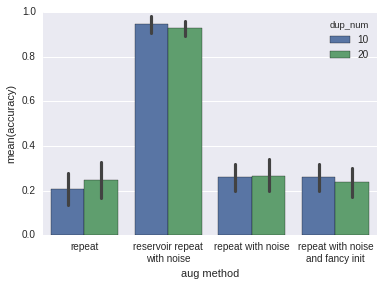

In [14]:
# we have to come up with a clever way of defining x
sns.barplot(x="aug method", y="accuracy", hue="dup_num", data=cf)